In [3]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

In [7]:
import sys
sys.path.insert(0, '')
import eda

In [12]:
instruments_dict = {}
instruments_dict['Instrument'] = []
instruments_dict['Sound'] = []

path = 'Audio-Classification wavfiles/'
for fol in os.listdir(path):
    inner_path = path + fol + '/'
    for file in os.listdir(inner_path):
        instruments_dict['Instrument'].append(fol)
        instruments_dict['Sound'].append(file)

In [16]:
df = pd.DataFrame(instruments_dict)
df

,Instrument,Sound
0,Acoustic_guitar,0356dec7.wav
1,Acoustic_guitar,0eeaebcb.wav
2,Acoustic_guitar,10da16fb.wav
3,Acoustic_guitar,160c92d7.wav
4,Acoustic_guitar,16c9a838.wav
...,...,...
295,Violin_or_fiddle,d6144e01.wav
296,Violin_or_fiddle,d84c8c43.wav
297,Violin_or_fiddle,d914225a.wav
298,Violin_or_fiddle,e3f479f3.wav


In [15]:
# if file does not exist write header 
if not os.path.isfile('instruments.csv'):
   df.to_csv('instruments.csv', header='column_names')
else: # else it exists so append without mentioning the header
   df.to_csv('instruments.csv', mode='a', header=False)

In [18]:
df.set_index('Sound', inplace = True)
df

,Instrument
Sound,
0356dec7.wav,Acoustic_guitar
0eeaebcb.wav,Acoustic_guitar
10da16fb.wav,Acoustic_guitar
160c92d7.wav,Acoustic_guitar
16c9a838.wav,Acoustic_guitar
...,...
d6144e01.wav,Violin_or_fiddle
d84c8c43.wav,Violin_or_fiddle
d914225a.wav,Violin_or_fiddle


In [21]:
for fol in os.listdir(path):
    inner_path = path + fol + '/'
    for file in os.listdir(inner_path):
        rate, signal = wavfile.read(inner_path+file)
        df.at[file, 'length'] = signal.shape[0]/rate
df

,Instrument,length
Sound,,
0356dec7.wav,Acoustic_guitar,7.12
0eeaebcb.wav,Acoustic_guitar,8.02
10da16fb.wav,Acoustic_guitar,3.34
160c92d7.wav,Acoustic_guitar,3.32
16c9a838.wav,Acoustic_guitar,3.14
...,...,...
d6144e01.wav,Violin_or_fiddle,2.96
d84c8c43.wav,Violin_or_fiddle,3.90
d914225a.wav,Violin_or_fiddle,4.02


In [25]:
classes = list(np.unique(df.Instrument))
class_dist = df.groupby(['Instrument'])['length'].mean()
class_dist

Instrument
Acoustic_guitar     6.948667
Bass_drum           1.937333
Cello               5.000667
Clarinet            6.596000
Double_bass         3.206000
Flute               8.054667
Hi_hat              3.357333
Saxophone           7.124000
Snare_drum          3.987333
Violin_or_fiddle    4.530000
Name: length, dtype: float64

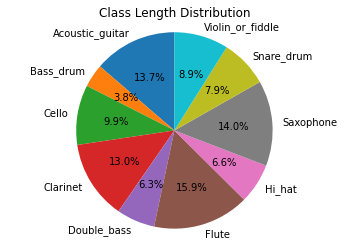

In [27]:
fig, ax = plt.subplots()
ax.set_title('Class Length Distribution')
ax.pie(class_dist, labels = class_dist.index, autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [ ]:
for c in classes:
    wavfile = df[df.label == c].iloc[0, 0]
    signal, rate = librosa.load(path + c + wavfile, sr = 44100)
    